In [111]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

Text(0, 0.5, 'time to usable shell (milliseconds)')

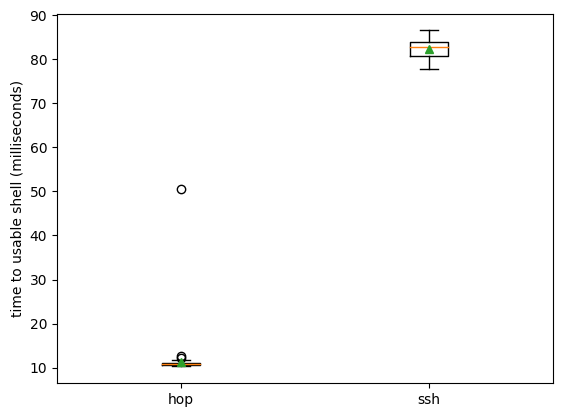

In [204]:
latency_data = np.genfromtxt("latency.csv", dtype="float64", delimiter=",", names=True)

fig, ax = plt.subplots()
ax.boxplot([latency_data["hop_time_microseconds"]/1000, latency_data["ssh_time_microseconds"]/1000], labels=["hop", "ssh"], showmeans=True)
ax.set_ylabel("time to usable shell (milliseconds)")

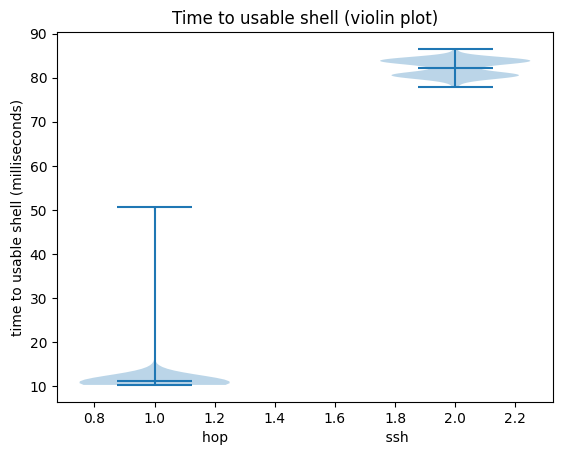

In [206]:
fig, ax = plt.subplots()
ax.violinplot([latency_data["hop_time_microseconds"]/1000, latency_data["ssh_time_microseconds"]/1000], showmeans=True)
ax.set_ylabel("time to usable shell (milliseconds)")
ax.set_xlabel("hop                                    ssh")
ax.set_title("Time to usable shell (violin plot)")
plt.show()

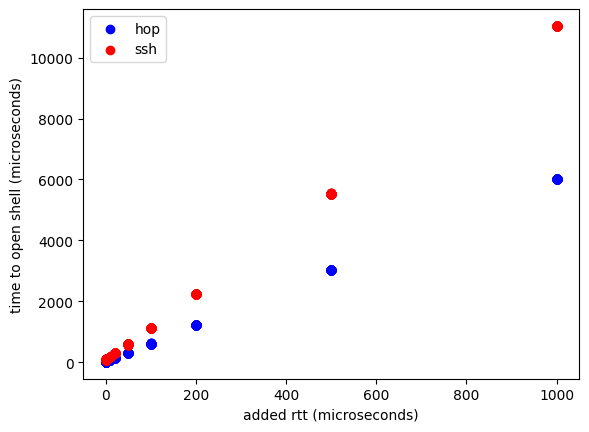

In [207]:
hop_rtt_latency_data = np.genfromtxt("hop_rtt_vs_latency.csv", dtype="float64", delimiter=",", names=True)
ssh_rtt_latency_data = np.genfromtxt("ssh_rtt_vs_latency.csv", dtype="float64", delimiter=",", names=True)

hop_rtt_latency_data["rtt_microseconds"] = hop_rtt_latency_data["rtt_microseconds"] / 1000
hop_rtt_latency_data["time_to_shell_microseconds"] = hop_rtt_latency_data["time_to_shell_microseconds"] / 1000
ssh_rtt_latency_data["rtt_microseconds"] = ssh_rtt_latency_data["rtt_microseconds"] / 1000
ssh_rtt_latency_data["time_to_shell_microseconds"] = ssh_rtt_latency_data["time_to_shell_microseconds"] / 1000

fig, ax = plt.subplots()
ax.scatter(x="rtt_microseconds", y="time_to_shell_microseconds", c="b", label="hop", data=hop_rtt_latency_data)
ax.scatter(x="rtt_microseconds", y="time_to_shell_microseconds", c="r", label="ssh", data=ssh_rtt_latency_data)
ax.set_xlabel("added rtt (microseconds)")
ax.set_ylabel("time to open shell (microseconds)")
ax.legend()
plt.show()

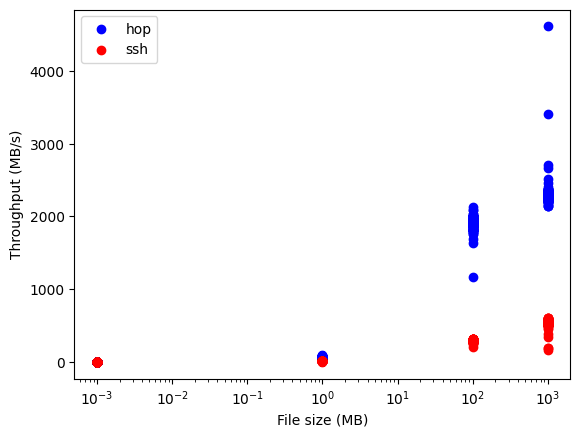

In [210]:
hop_throughput_data = np.genfromtxt("hop_throughput.csv.backup", dtype="float64", delimiter=",", names=True)
ssh_throughput_data = np.genfromtxt("ssh_throughput.csv.backup", dtype="float64", delimiter=",", names=True)

fig, ax = plt.subplots()
ax.scatter(hop_throughput_data["file_size_bytes"] / 1000000, \
           hop_throughput_data["file_size_bytes"] / (1000000 * hop_throughput_data["time_to_transfer_seconds"]),\
           c="b", label="hop")

ax.scatter(ssh_throughput_data["file_size_bytes"] / 1000000, \
           ssh_throughput_data["file_size_bytes"] / (1000000 * ssh_throughput_data["time_to_transfer_seconds"]),\
           c="r", label="ssh")

ax.set_xscale("log")
ax.set_xlabel("File size (MB)")
ax.set_ylabel("Throughput (MB/s)")
ax.legend()
plt.show()